# ECG

In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np
from scipy.misc import electrocardiogram
from scipy.signal import find_peaks
import os
from operator import itemgetter

123456789-7885-MDC_ECG_ELEC_POTL_II-500.csv:


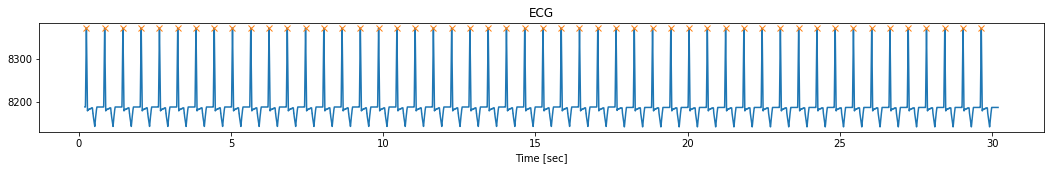

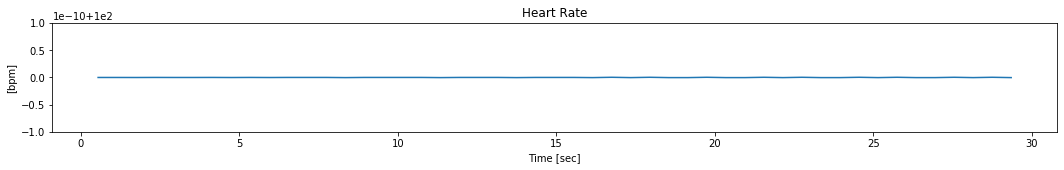

123456789-7891-MDC_ECG_ELEC_POTL_II-500.csv:


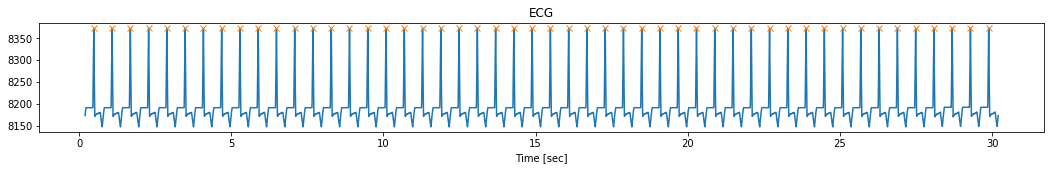

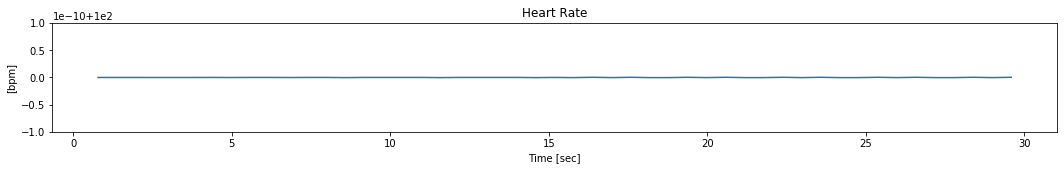

123456789-7899-MDC_ECG_ELEC_POTL_II-500.csv:


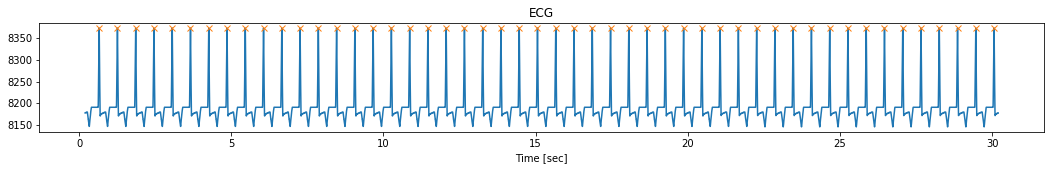

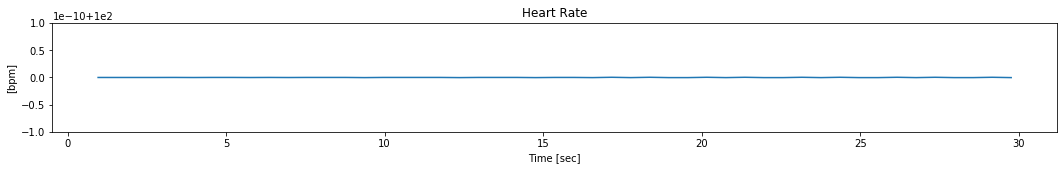

123456789-7917-MDC_ECG_ELEC_POTL_II-500.csv:


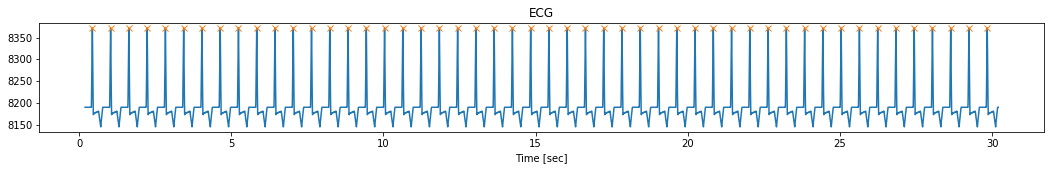

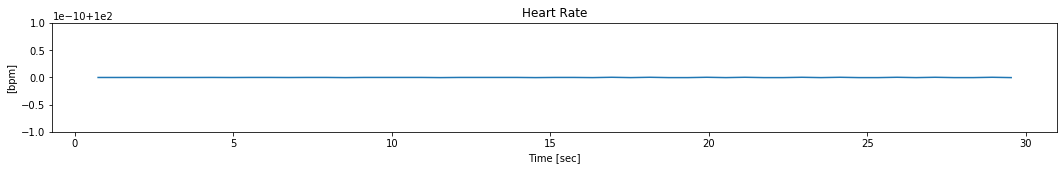

1887524-1979-MDC_ECG_ELEC_POTL_II-500.csv:


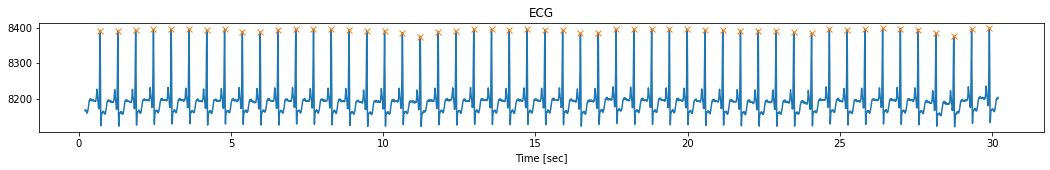

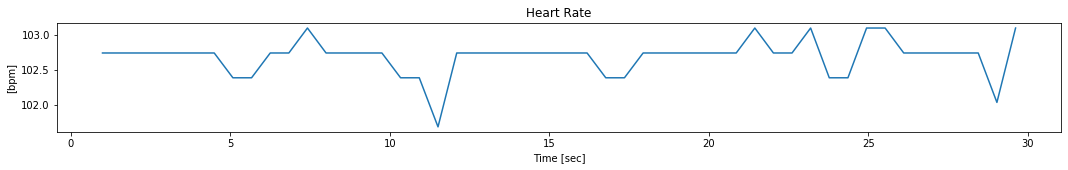

1986951-5721-MDC_ECG_ELEC_POTL_II-500.csv:


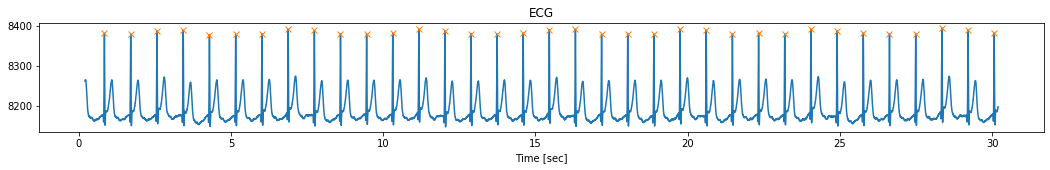

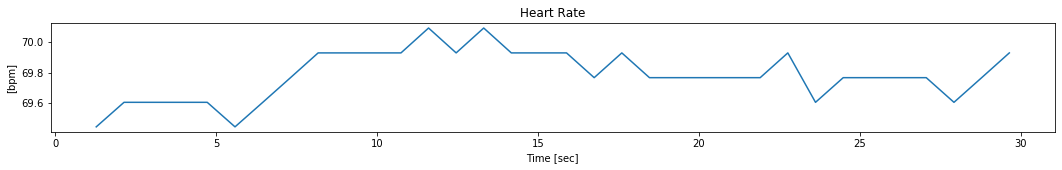

2175591-9564-MDC_ECG_ELEC_POTL_II-500.csv:


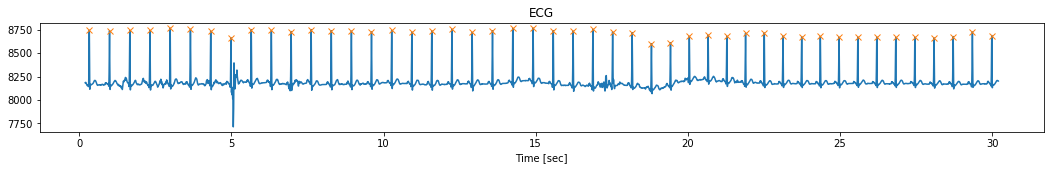

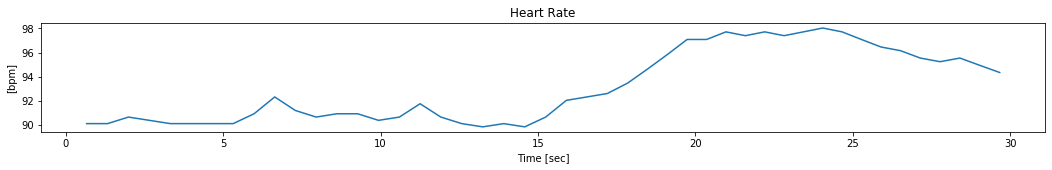

268269-2358-MDC_ECG_ELEC_POTL_II-500.csv:


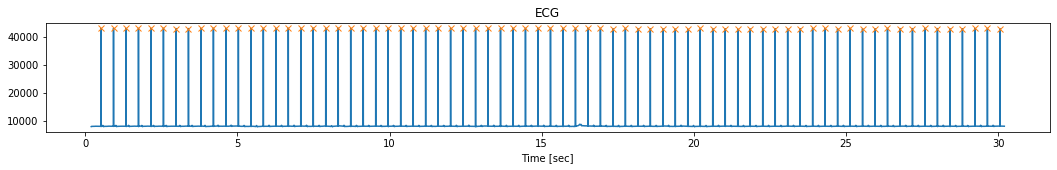

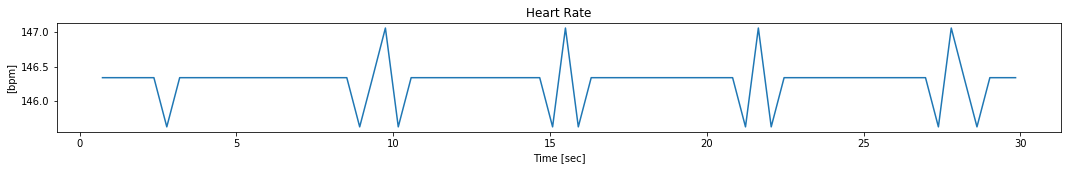

268269-2406-MDC_ECG_ELEC_POTL_II-500.csv:


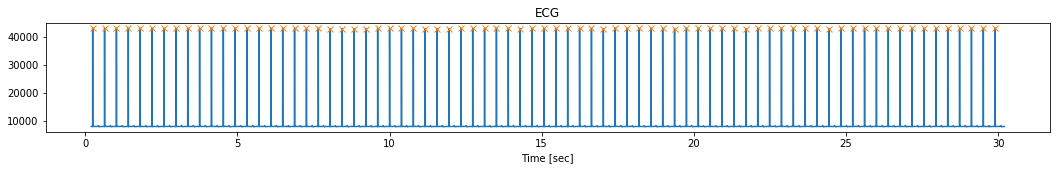

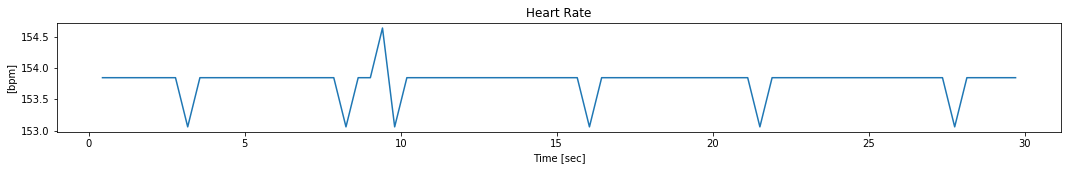

268269-2424-MDC_ECG_ELEC_POTL_II-500.csv:


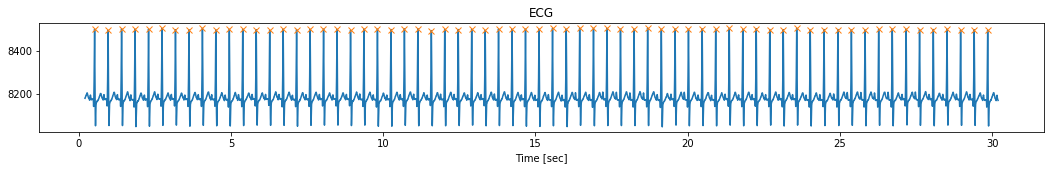

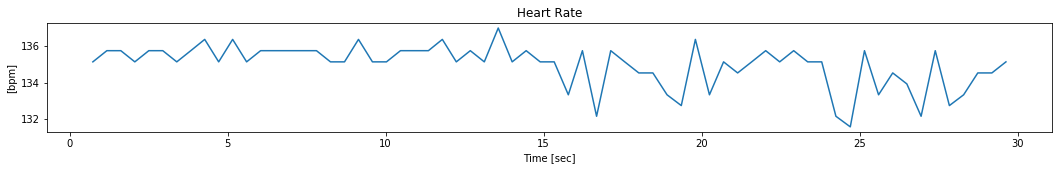

268269-2425-MDC_ECG_ELEC_POTL_II-500.csv:


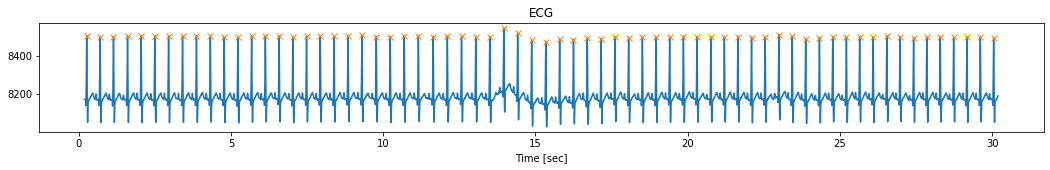

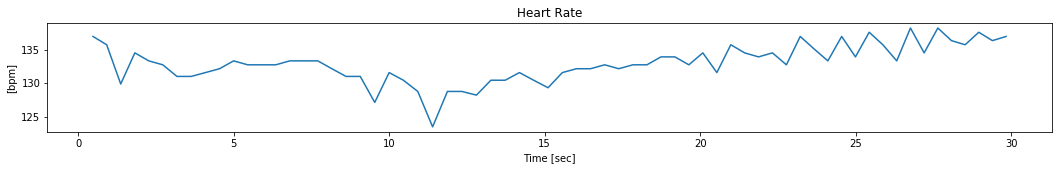

268269-2426-MDC_ECG_ELEC_POTL_II-500.csv:


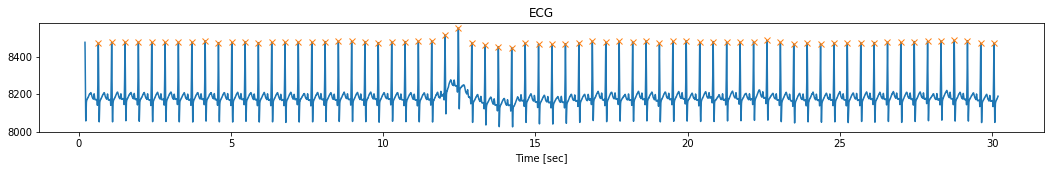

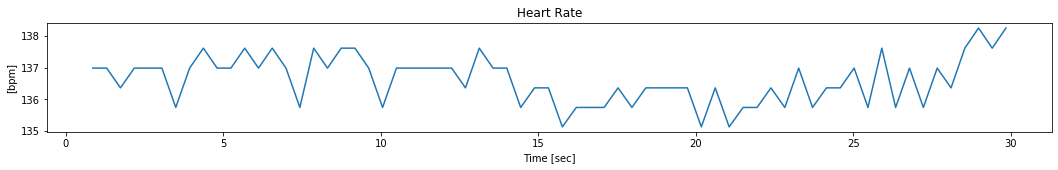

268269-2427-MDC_ECG_ELEC_POTL_II-500.csv:


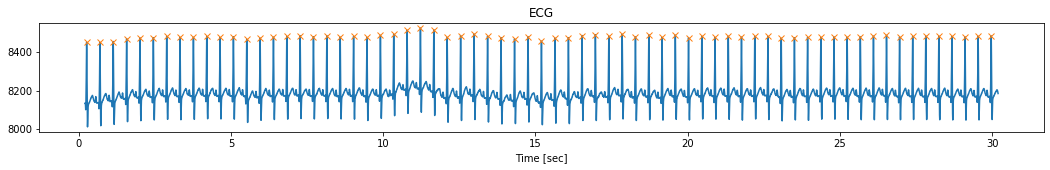

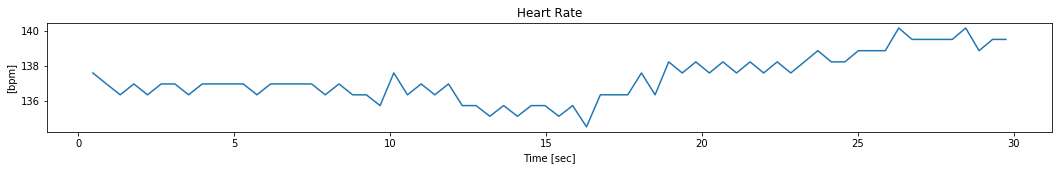

268269-2428-MDC_ECG_ELEC_POTL_II-500.csv:


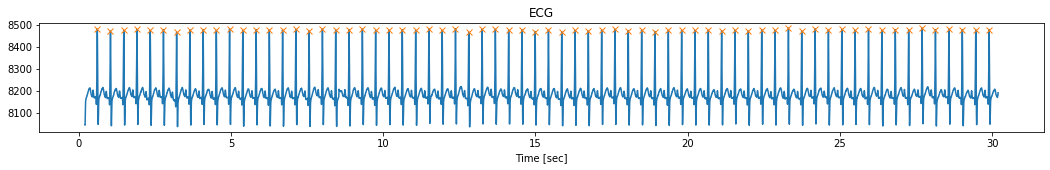

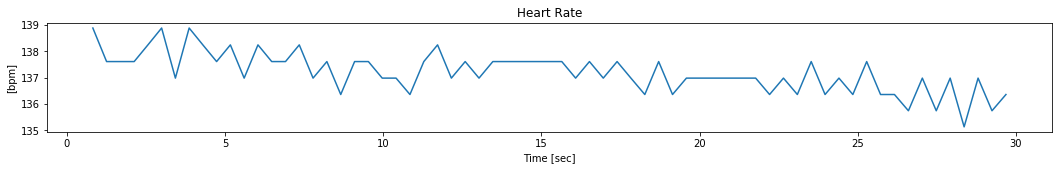

268269-2429-MDC_ECG_ELEC_POTL_II-500.csv:


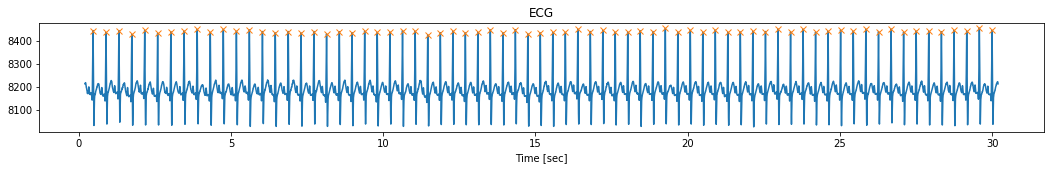

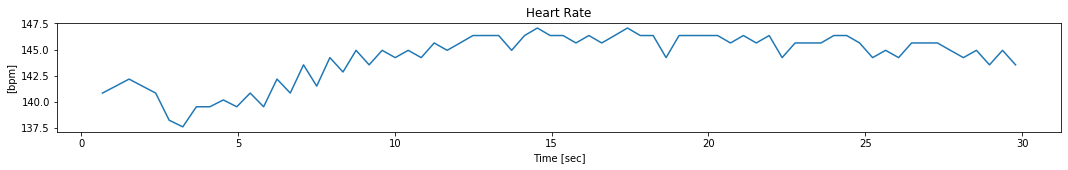

268269-2430-MDC_ECG_ELEC_POTL_II-500.csv:


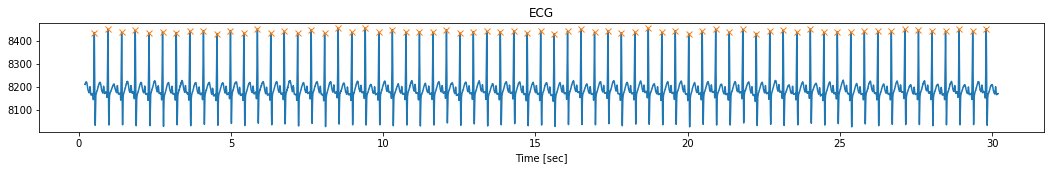

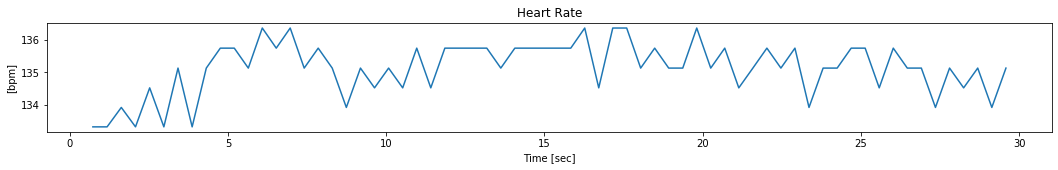

268269-2431-MDC_ECG_ELEC_POTL_II-500.csv:


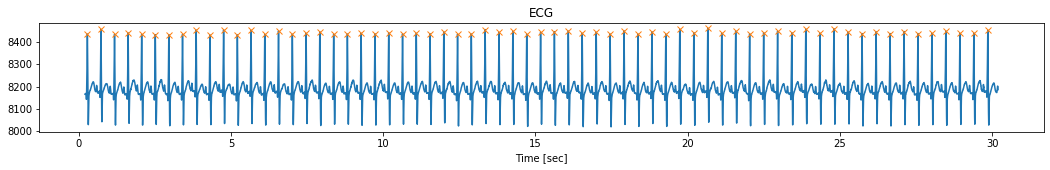

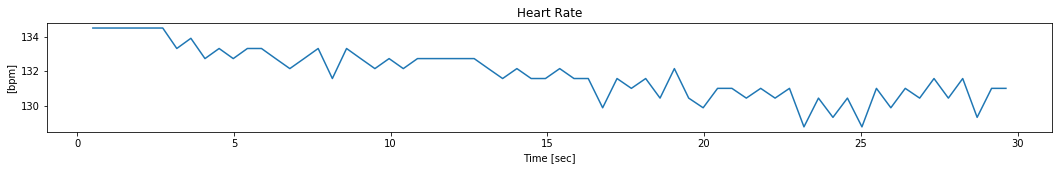

2784152-1242-MDC_ECG_ELEC_POTL_II-500.csv:


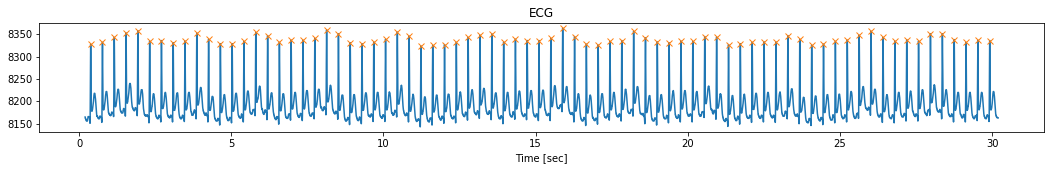

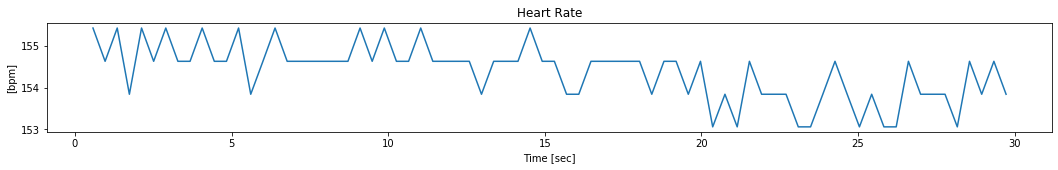

2784152-1275-MDC_ECG_ELEC_POTL_II-500.csv:


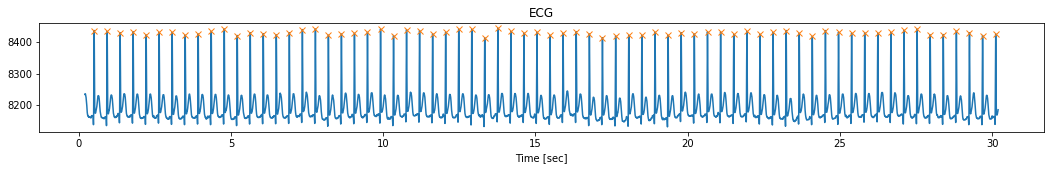

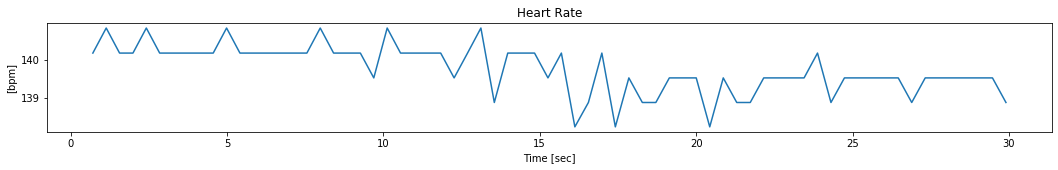

5047636-1580-MDC_ECG_ELEC_POTL_II-500.csv:


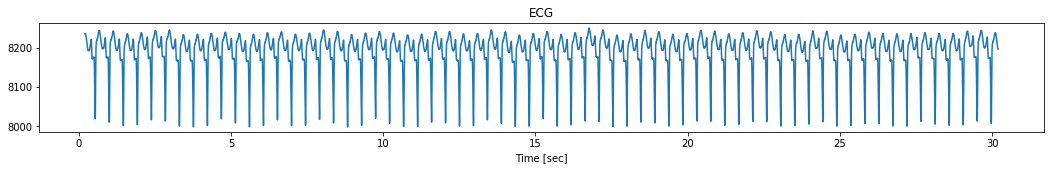

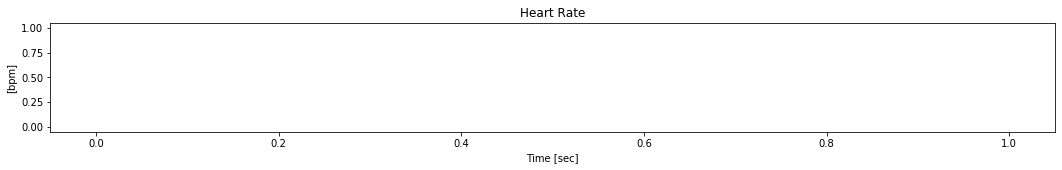

In [2]:
START_POINT=100
END_POINT=15100
t = np.arange(START_POINT*0.002, END_POINT*0.002, 0.002)
ecg = []
for filename in os.listdir('samples'):
    if "MDC_ECG_ELEC_POTL_II-500" in filename:
        print(filename+':')
        with open('samples/'+ filename, 'r') as f:
            reader = csv.reader(f)
            for row in reader:
                ecg.append(float(row[1]))
            
            ecg_small = np.array(ecg[START_POINT:END_POINT])            
            peaks,_=find_peaks(ecg_small, height=8300, distance=155) #60/(220*0.002)
            peaks_sec = (peaks + START_POINT) * 0.002
            
            plt.figure(figsize=(18, 2))
            plt.plot(t,ecg_small)
            plt.plot(peaks_sec, ecg_small[peaks], "x")
            plt.title('ECG')
            plt.xlabel('Time [sec]')
            plt.show()
            ecg = []
            
            diffs = np.diff(peaks_sec)
            peaks_sec = peaks_sec[:len(diffs)]+diffs/2
            hr = 60/diffs
            
            plt.figure(figsize=(18, 2))
            plt.plot(peaks_sec,hr)
            plt.title('Heart Rate')
            plt.xlabel('Time [sec]')
            plt.ylabel('[bpm]')
            plt.show()
